In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#データセットの定義 (1列目:x0, 2列目:x1, 3列目:x2, 4列目:t)
#ANDデータ
data = np.array([[1, 0, 0, -1],
                 [1, 1, 0, -1],
                 [1, 0, 1, -1],
                 [1, 1, 1, 1],
                ])

x = data[:,1:3] #2,3列目をxに代入
t = data[:,3] #4列目をyに代入

In [3]:
#ORデータ
data = np.array([[1, 0, 0, -1],
                 [1, 1, 0, 1],
                 [1, 0, 1, 1],
                 [1, 1, 1, 1],
                ])

x = data[:,1:3] #2,3列目をxに代入
t = data[:,3] #4列目をyに代入

In [4]:
#XORデータ
data = np.array([[1, 0, 0, -1],
                 [1, 1, 0, 1],
                 [1, 0, 1, 1],
                 [1, 1, 1, -1],
                ])

x = data[:,1:3] #2,3列目をxに代入
t = data[:,3] #4列目をyに代入

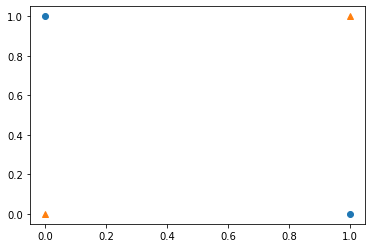

In [5]:
#グラフ表示
plt.plot(x[t == 1, 0], x[t == 1, 1], 'o')
plt.plot(x[t == -1, 0], x[t == -1, 1], '^')

In [6]:
from sklearn.linear_model import Perceptron

In [7]:
#最大繰り返し回数(max_iter)、学習率(eta0)でパーセプトロン作成
ppn = Perceptron(max_iter = 10000,eta0 = 0.1)
ppn.fit(data[:,1:3].reshape(-1,2), data[:,3])

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=10000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
#学習結果確認
print(ppn.coef_) #ウエイト
print(ppn.intercept_) #切片(w0)
print(ppn.n_iter_) #繰り返し回数
print(ppn.classes_) #分類されたクラス

[[0. 0.]]
[0.]
6
[-1  1]


In [9]:
#結果の確認
y_pred = ppn.predict(data[:,1:3].reshape(-1,2))
print(y_pred) #各データの分類結果
print('Missclassified samples:%d'%(data[:,3] != y_pred).sum())

[-1 -1 -1 -1]
Missclassified samples:2


In [10]:
from sklearn.metrics import accuracy_score
#正解率の表示
print('Accuracy:%.2f'%accuracy_score(data[:,3],y_pred))

Accuracy:0.50


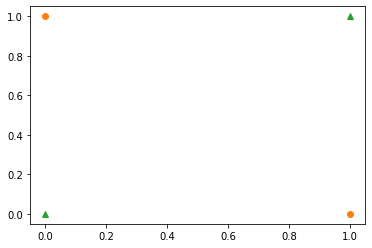

In [11]:
p = np.arange(-0.2, 1.2, 0.01)
q = -ppn.intercept_[0]/ppn.coef_[0][1] - ppn.coef_[0][0]/ppn.coef_[0][1]*p
plt.plot(p, q)
plt.plot(x[t == 1, 0], x[t == 1, 1], 'o')
plt.plot(x[t == -1, 0], x[t == -1, 1], '^')

関数仕様  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html